In [1]:
from nilearn import plotting
import bids
from ghost.phantom import Caliber137
import matplotlib.pyplot as plt
import nibabel as nib
from scipy.ndimage import center_of_mass
import numpy as np

In [2]:
projdir = '/Users/emil/Projects/QA/CaliberPaper/ghost_bids_analysis'
layout = bids.BIDSLayout(root=projdir+'/rawdata', derivatives=projdir+'/derivatives')

# Parse all sessions for sub P0004
p0004_scans = layout.get(scope='raw', extension='.nii.gz', subject='P0004')
sessions = []
for f in p0004_scans:
    ses = f.get_entities()['session']
    if ses not in sessions:
        sessions.append(ses)

In [3]:
# One example session to do everything
sub = 'P0004'
ses = '20230629100751'
phantom = Caliber137()
axi1 = layout.get(scope='raw', extension='.nii.gz', subject=sub, reconstruction='axi', session=ses, run=1)[0]
axi2 = layout.get(scope='raw', extension='.nii.gz', subject=sub, reconstruction='axi', session=ses, run=2)[0]
sag = layout.get(scope='raw', extension='.nii.gz', subject=sub, reconstruction='sag', session=ses)[0]
fisp = layout.get(scope='raw', extension='.nii.gz', subject=sub, suffix='PDw', session=ses, run=None)[0]

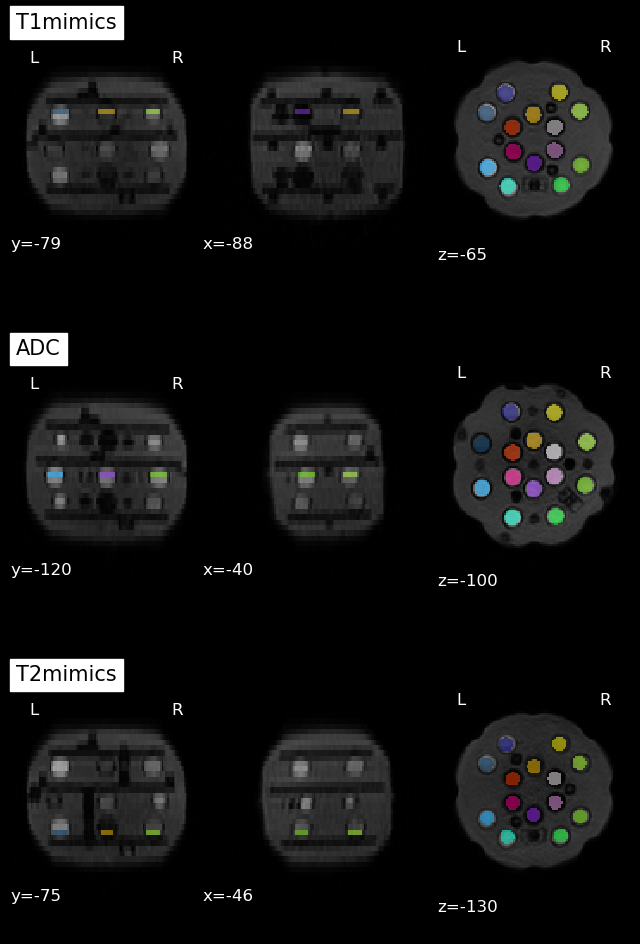

In [4]:
plt.style.use('dark_background')
fig, axes = plt.subplots(3,1, figsize=(8,12))

for i,mimics in enumerate(['T1mimics', 'ADC', 'T2mimics']):
    seg = layout.get(scope='derivatives', suffix='T2w', subject=sub, session=ses, run=1, reconstruction='axi', desc=f'seg{mimics}2D')[0].get_image()
    plotting.plot_roi(seg, bg_img=axi1.get_image(), figure=fig, axes=axes[i], title=mimics, draw_cross=False, alpha=0.5)


/Users/emil/miniforge3/envs/rrdf2/lib/python3.11/site-packages/nilearn/plotting/displays/_slicers.py:1443: UserWarning:

A non-diagonal affine is found in the given image. Reordering the image to get diagonal affine for finding cuts in the slices.



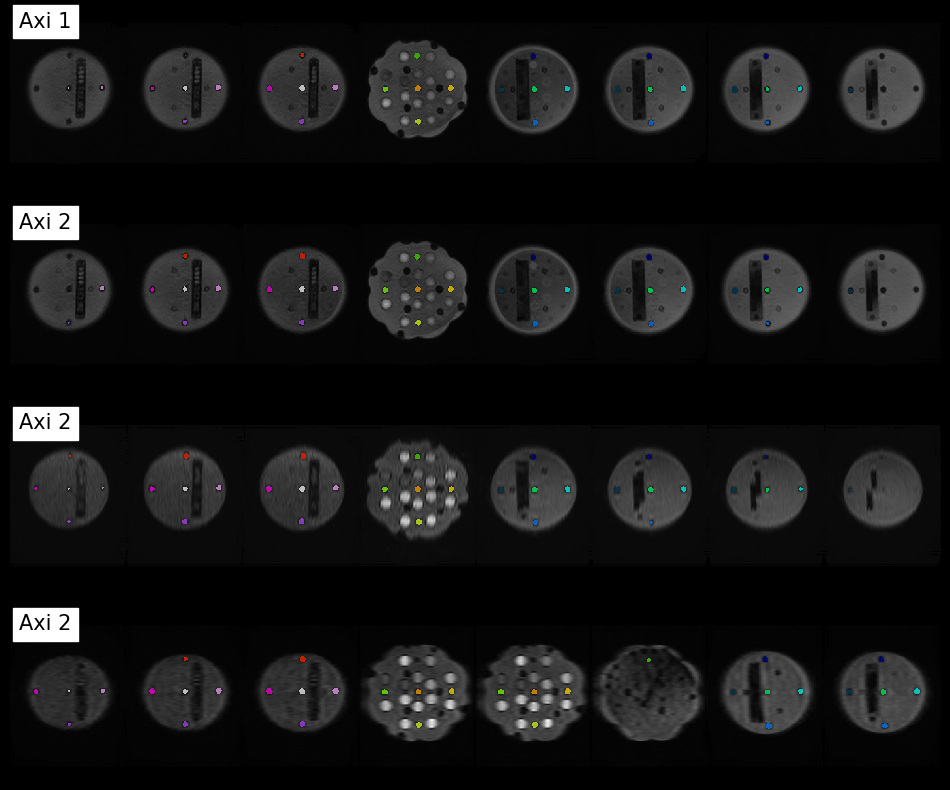

In [5]:
plt.style.use('dark_background')

# Make into new 3D image
fig, axes = plt.subplots(4,1,figsize=(12,10))

for run in range(2):
    img = layout.get(scope='derivatives', suffix='T2w', subject=sub, session=ses, run=run+1, extension='.nii.gz', desc=None, reconstruction='axiInterp')[0].get_image()
    seg = layout.get(scope='derivatives', suffix='T2w', subject=sub, session=ses, reconstruction='axiInterp', run=run+1, desc=f'segRegFidLabels')[0].get_image()
    plotting.plot_roi(seg, bg_img=img, display_mode='z', dim=0, cut_coords=(8), alpha=0.75, figure=fig, axes=axes[run], title=f'Axi {run+1}', annotate=False)

img = layout.get(scope='derivatives', suffix='T2w', 
                 subject=sub, session=ses, 
                 extension='.nii.gz', desc=None, reconstruction='corInterp')[0].get_image()

seg = layout.get(scope='derivatives', suffix='T2w', 
                 subject=sub, session=ses, reconstruction='corInterp', 
                 run=None, desc=f'segRegFidLabels')[0].get_image()
plotting.plot_roi(seg, bg_img=img, display_mode='z', dim=0, cut_coords=(8), alpha=0.75, figure=fig, axes=axes[2], title=f'Axi {run+1}', annotate=False)

img = layout.get(scope='derivatives', suffix='T2w', 
                 subject=sub, session=ses, 
                 extension='.nii.gz', desc=None, reconstruction='sagInterp')[0].get_image()

seg = layout.get(scope='derivatives', suffix='T2w', 
                 subject=sub, session=ses, reconstruction='sagInterp', 
                 run=None, desc=f'segRegFidLabels')[0].get_image()
plotting.plot_roi(seg, bg_img=img, display_mode='z', dim=0, cut_coords=(8), alpha=0.75, figure=fig, axes=axes[3], title=f'Axi {run+1}', annotate=False)


TypeError: use() missing 1 required positional argument: 'style'